In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import gymnasium as gym
import gym_anytrading
from gym_anytrading.envs import Actions

from stable_baselines3 import A2C

import quantstats as qs

In [3]:
import pandas as pd
df=pd.read_csv("fulldf.csv",index_col=0)

In [4]:
# Chuyển cột 'datadate' sang dạng datetime và định dạng lại nó
# df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d%H%M%S')

# Đặt cột 'datadate' làm chỉ mục cho DataFrame
df.set_index('Date', inplace=True)

In [5]:
df=df.fillna(0)

In [6]:
split_idx = int(0.8 * len(df))
# Split the DataFrame
train_df = df[:split_idx]
test_df = df[split_idx:]

In [7]:
train_df

,Open,High,Low,Close,Volume,EMA,RSI,Turbulence
Date,,,,,,,,
2023-12-15 01:00:00,0.86417,0.86517,0.86368,0.86491,4789,0.864910,0.000000,0.000000
2023-12-15 01:03:00,0.86490,0.86657,0.86474,0.86656,3363,0.865735,0.000000,0.000000
2023-12-15 02:00:00,0.86656,0.86716,0.86612,0.86649,3093,0.865987,0.000000,0.647110
2023-12-15 02:03:00,0.86650,0.86688,0.86610,0.86650,3699,0.866115,95.930233,0.550151
2023-12-15 03:00:00,0.86650,0.86653,0.86586,0.86586,2166,0.866064,95.953757,-0.317193
...,...,...,...,...,...,...,...,...
2023-12-21 22:00:00,0.85749,0.85917,0.85719,0.85811,8684,0.865058,18.708827,-1.397239
2023-12-21 22:03:00,0.85811,0.85866,0.85690,0.85710,8556,0.865024,20.998720,-1.766887
2023-12-21 23:00:00,0.85711,0.85728,0.85635,0.85663,8191,0.864989,17.090069,-1.774704


In [8]:
test_df

,Open,High,Low,Close,Volume,EMA,RSI,Turbulence
Date,,,,,,,,
2023-12-22 00:03:00,0.85852,0.85883,0.85807,0.85833,5106,0.864904,30.182599,-0.613606
2023-12-22 01:00:00,0.85833,0.85888,0.85790,0.85859,5627,0.864878,30.743982,-0.414988
2023-12-22 01:03:00,0.85860,0.85885,0.85825,0.85842,5178,0.864851,35.614849,-0.427122
2023-12-22 02:00:00,0.85841,0.85842,0.85761,0.85770,3843,0.864822,40.933333,-0.758230
2023-12-22 02:03:00,0.85770,0.85778,0.85671,0.85704,3619,0.864790,41.208054,-1.078435
2023-12-22 03:00:00,0.85704,0.85726,0.85681,0.85715,3154,0.864759,40.341656,-0.931193
2023-12-22 03:03:00,0.85715,0.85721,0.85643,0.85648,3026,0.864726,38.896366,-1.405214
2023-12-22 04:00:00,0.85649,0.85658,0.85615,0.85626,2283,0.864691,42.005814,-1.648095
2023-12-22 04:03:00,0.85625,0.85632,0.85604,0.85606,1083,0.864657,41.051136,-1.926121


In [9]:
from gym_anytrading.envs import ForexEnv
def my_process_data(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Close'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Close', 'High', 'Low', 'Volume', 'Turbulence', 'RSI']].to_numpy()[start:end]
    return prices, signal_features



class MyForexEnv(ForexEnv):
    _process_data = my_process_data


window_size = 10
start_index = window_size
end_index = len(train_df)

env_train = MyForexEnv(df=train_df, window_size=window_size, frame_bound=(start_index, end_index))

In [10]:
action_stats = {Actions.Sell: 0, Actions.Buy: 0}

model = A2C('MlpPolicy', env_train, verbose=0)
# print(model)
model.learn(total_timesteps=10)
print(model)
env_trade = MyForexEnv(df=test_df, window_size=window_size, frame_bound=(start_index, len(test_df)))
while True:
    model.set_env(env_trade, force_reset=True)
    # action = env_train.action_space.sample()
    action, _states = model.predict(observation)

    action_stats[Actions(action)] += 1
    observation, reward, terminated, truncated, info = env_trade.step(action)
    done = terminated or truncated
    # env_train.render()
    if done:
        break
# env_trade.close()
print("action_stats:", action_stats)
print("info:", info)

NameError: name 'observation' is not defined

In [85]:
action_stats = {Actions.Sell: 0, Actions.Buy: 0}
observation, info = env.reset(seed=2023)

while True:
    # action = env.action_space.sample()
    action, _states = model.predict(observation)

    action_stats[Actions(action)] += 1
    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

    # env.render()
    if done:
        break

env.close()

print("action_stats:", action_stats)
print("info:", info)

action_stats: {<Actions.Sell: 0>: 117, <Actions.Buy: 1>: 112}
info: {'total_reward': 147.8999999999908, 'total_profit': 0.9964002867410225, 'position': <Positions.Short: 0>}


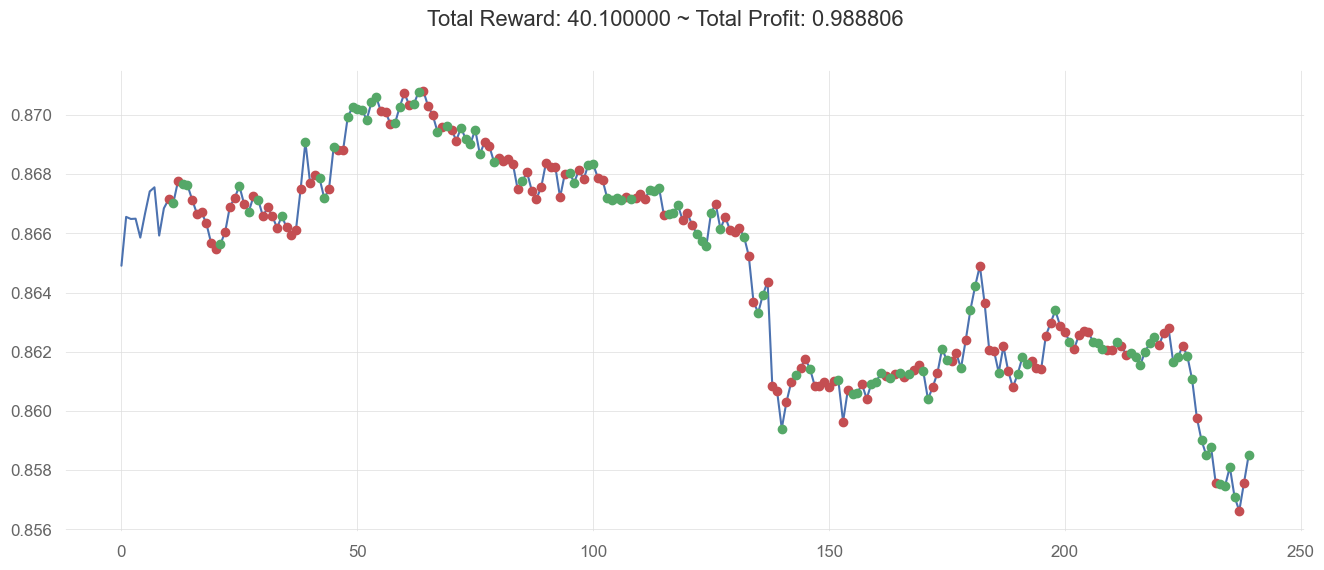

In [59]:
plt.figure(figsize=(16, 6))
env.unwrapped.render_all()
plt.show()

In [41]:
action_stats = {Actions.Sell: 0, Actions.Buy: 0}

observation, info = env.reset(seed=2023)

while True:
    # action = env.action_space.sample()
    action, _states = model.predict(observation)

    action_stats[Actions(action)] += 1
    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

    # env.render()
    if done:
        break

env.close()

print("action_stats:", action_stats)
print("info:", info)

action_stats: {<Actions.Sell: 0>: 79, <Actions.Buy: 1>: 150}
info: {'total_reward': 33.50000000000745, 'total_profit': 0.9910782251950087, 'position': <Positions.Long: 1>}


In [42]:
from vungo.reports import full
qs.extend_pandas()

net_worth = pd.Series(env.unwrapped.history['total_profit'], index=df.index[start_index+1:end_index])
returns = net_worth.pct_change().iloc[1:]

metrics= full(returns, tic_name="EURH1", model_name="TD3")
# qs.reports.html(returns, output='SB3_a2c_quantstats.html')

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [11]:
metrics